In [1]:
num_of_lamps = 4
search_space_qubits = 2
helper_qubits = num_of_lamps - 1
number_of_iterations = 1

{'11': 10000}
32


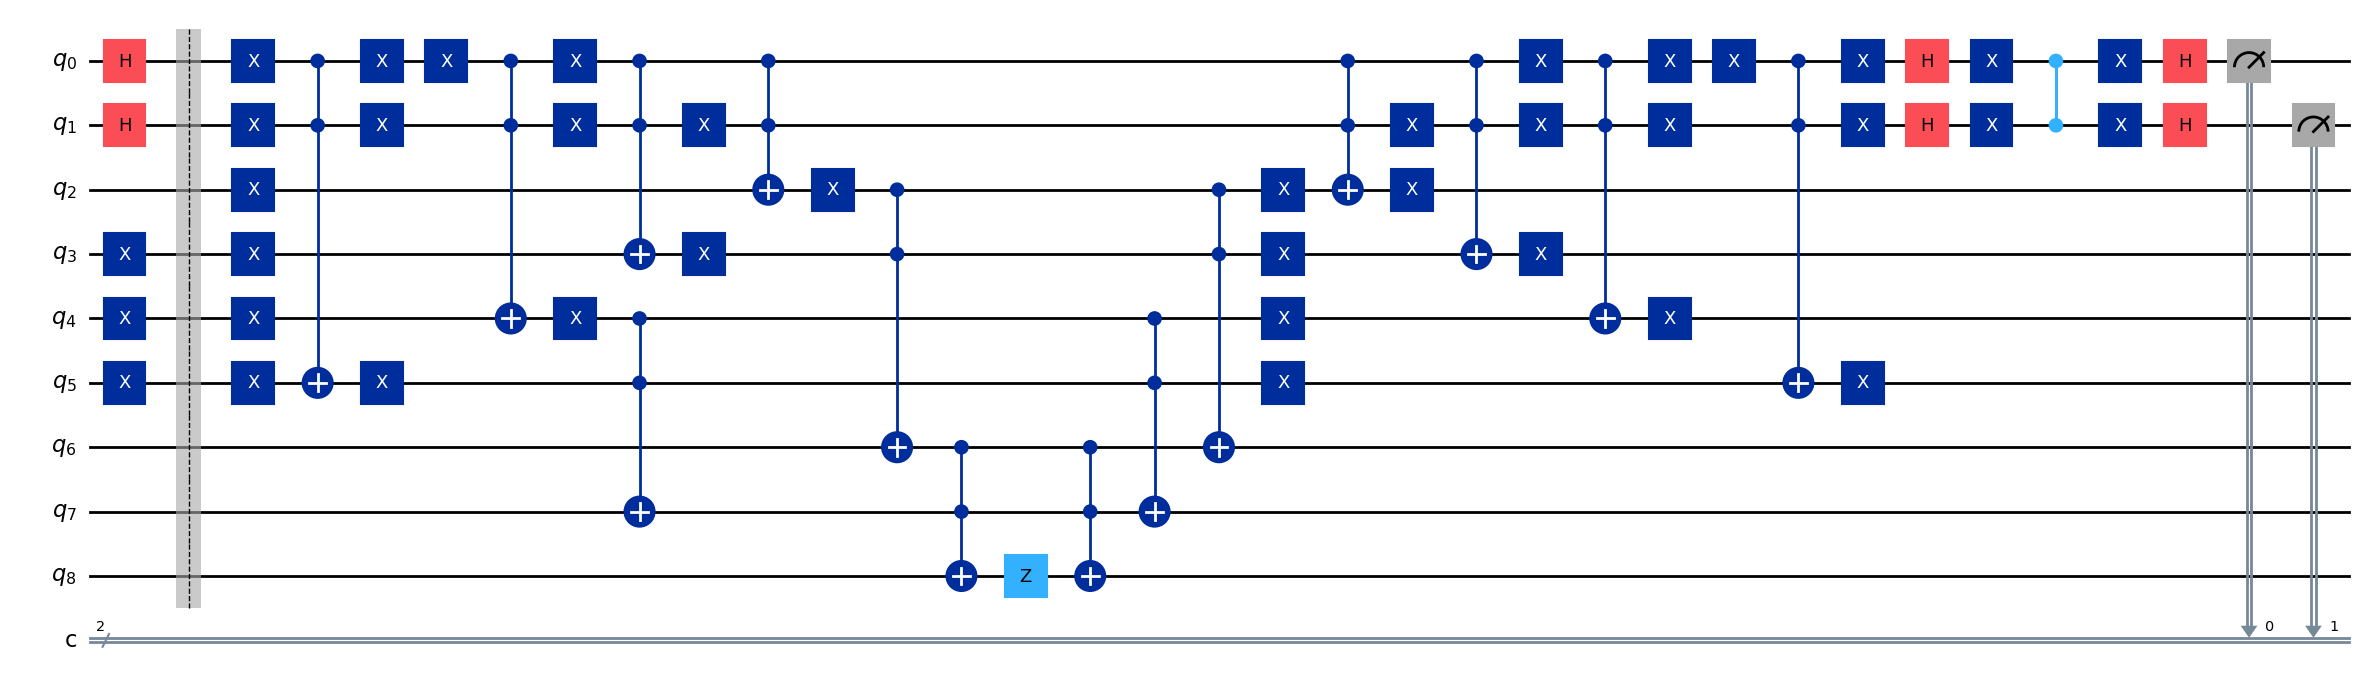

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi

oracle = QuantumCircuit(search_space_qubits + num_of_lamps + helper_qubits)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.x(0)
oracle.x(1)
oracle.ccx(0,1,search_space_qubits+3)
oracle.x(0)
oracle.x(1)

oracle.x(0)
oracle.ccx(0,1,search_space_qubits+2)
oracle.x(0)

oracle.x(1)
oracle.ccx(0,1,search_space_qubits+1)
oracle.x(1)

oracle.ccx(0,1,search_space_qubits)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits + num_of_lamps, search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2)
oracle.z(search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits + num_of_lamps, search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.ccx(0,1,search_space_qubits)

oracle.x(1)
oracle.ccx(0,1,search_space_qubits+1)
oracle.x(1)

oracle.x(0)
oracle.ccx(0,1,search_space_qubits+2)
oracle.x(0)

oracle.x(0)
oracle.x(1)
oracle.ccx(0,1,search_space_qubits+3)
oracle.x(0)
oracle.x(1)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

grover = QuantumCircuit(search_space_qubits + num_of_lamps + helper_qubits, search_space_qubits)

#Input
grover.x(search_space_qubits+1)
grover.x(search_space_qubits+2)
grover.x(search_space_qubits+3)

for i in range(search_space_qubits):
    grover.h(i)
grover.barrier()

for i in range(number_of_iterations):
    grover = grover.compose(oracle)
    
    for j in range(search_space_qubits):
        grover.h(j)
    for j in range(search_space_qubits):
        grover.x(j)
    grover.cz(0,1)
    for j in range(search_space_qubits):
        grover.x(j)
    for j in range(search_space_qubits):
        grover.h(j)

grover.measure(range(search_space_qubits),range(search_space_qubits))

job = AerSimulator().run(grover,shots=10000)
counts = job.result().get_counts(grover)
print(counts)

print(grover.depth())
grover.draw(output='mpl', fold=50)

In [3]:
from qiskit.qasm2 import dumps
qasm_str = dumps(grover)
print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[9];
creg c[2];
x q[3];
x q[4];
x q[5];
h q[0];
h q[1];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8];
x q[2];
x q[3];
x q[4];
x q[5];
x q[0];
x q[1];
ccx q[0],q[1],q[5];
x q[0];
x q[1];
x q[0];
ccx q[0],q[1],q[4];
x q[0];
x q[1];
ccx q[0],q[1],q[3];
x q[1];
ccx q[0],q[1],q[2];
x q[2];
x q[3];
x q[4];
x q[5];
ccx q[2],q[3],q[6];
ccx q[4],q[5],q[7];
ccx q[6],q[7],q[8];
z q[8];
ccx q[6],q[7],q[8];
ccx q[4],q[5],q[7];
ccx q[2],q[3],q[6];
x q[2];
x q[3];
x q[4];
x q[5];
ccx q[0],q[1],q[2];
x q[1];
ccx q[0],q[1],q[3];
x q[1];
x q[0];
ccx q[0],q[1],q[4];
x q[0];
x q[0];
x q[1];
ccx q[0],q[1],q[5];
x q[0];
x q[1];
x q[2];
x q[3];
x q[4];
x q[5];
h q[0];
h q[1];
x q[0];
x q[1];
cz q[0],q[1];
x q[0];
x q[1];
h q[0];
h q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService.save_account(
    
)

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()

print('Least busy:')
service.least_busy(simulator=False, operational=True, min_num_qubits=5)

Least busy:


<IBMBackend('ibm_fez')>

In [6]:
backend = service.backend("ibm_marrakesh")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5l104avcahs73a2ihng
>>> Job Status: QUEUED


In [7]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'11': 1774, '10': 693, '00': 714, '01': 819}


In [8]:
backend = service.backend("ibm_fez")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5l11sqvcahs73a2il60
>>> Job Status: QUEUED


In [9]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'11': 1823, '10': 789, '01': 753, '00': 635}


In [10]:
backend = service.backend("ibm_torino")

from qiskit import transpile

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=2, backend=backend)
isa_circuit = pm.run(grover)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

job = sampler.run([isa_circuit], shots=4000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d5l11usjt3vs73dt1ivg
>>> Job Status: QUEUED


In [11]:
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'01': 924, '11': 1746, '00': 604, '10': 726}


<h2>Composer results</h2>

<h3>ibm_marrakesh</h3>

00	921

01	953

10	1015

11	1111

<h3>ibm_fez</h3>

00	672

01	1110

10	650

11	1568

<h3>ibm_torino</h3>

00	696

01	939

10	762

11	1603